In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py

In [5]:
import seaborn as sns

In [6]:
import plotly.graph_objs as go

In [3]:
data=pd.read_csv("WorldCups.csv")

In [70]:
init_notebook_mode(connected=True)



In [72]:
import plotly.plotly as py
import plotly.graph_objs as go
import random
import numpy as np
import pandas as pd

l= []
y= []
data= pd.read_csv("WorldCups.csv")

trace0= go.Scatter(
    x= data['Year'],
    y= data['GoalsScored'],
    mode= 'markers+lines',
    marker= dict(size= 14,
                    line= dict(width=1),
                    color= data['GoalsScored'],
                    opacity= 0.8
                   )
    )
l.append(trace0);

layout= go.Layout(
    title= 'Total GoalsScored in an Year',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'GoalsScored',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l, layout=layout)
iplot(fig)

In [99]:
import plotly.plotly as py
import plotly.graph_objs as go

matches=pd.read_csv("WorldCupMatches.csv")
matches = matches.drop_duplicates(subset="MatchID",keep="first")
matches = matches[matches["Year"].notnull()]
att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)

trace0 = go.Bar(
    x=att['Year'],
    y=att['Attendance'],
    name='AA',
    marker=dict(
        color=att['Year']
    )
)
data = [trace0]

layout= go.Layout(
    title= 'Attendance of Crowd In a particular Year',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Attendance in Millions',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
    
)
fig=go.Figure(data=data,layout=layout)
iplot(fig)



In [37]:
matches  = pd.read_csv(r"WorldCupMatches.csv")
cups     = pd.read_csv(r"WorldCups.csv")
display("MATCHES - DATA")
display(matches.head(3))
display("WORLD CUPS - DATA")
display(cups.head(3))

'MATCHES - DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


'WORLD CUPS - DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Lattitude_w,Longitude_w
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,34°50'S,56°11'W
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363,41°54'N,12°29'E
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7,41°54'N,12°29'E


In [38]:
new_matches=pd.read_csv("WorldCupMatches.csv", usecols= ['Year','Datetime','Stadium','City','Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Attendance','MatchID','Home Team Initials','Away Team Initials'])


In [39]:
display(new_matches.head(3))

,Year,Datetime,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0,1093.0,YUG,BRA


In [101]:
cups["Winner"]=cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany")
cups["Year1"] = cups["Year"].astype(str)

c1  = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = cups.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

trace0 = go.Bar(
    x=c12['Winner'],
    y=c12['Year'],
    name='AA',
    marker=dict(
        color=c12['Year']
    )
)

layout= go.Layout(
    title= 'Teams With Most number of WorldCup Victory',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Teams',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Number of Victories',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
    
)
data = [trace0]
fig=go.Figure(data=data,layout=layout)
iplot(fig)




In [55]:
cou = cups["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = cups["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r],axis=0)
display(cou_t.head)

<bound method NDFrame.head of           country  count         type
0          Brazil      5       WINNER
1           Italy      4       WINNER
2         Germany      4       WINNER
3       Argentina      2       WINNER
4         Uruguay      2       WINNER
5          France      1       WINNER
6         England      1       WINNER
7           Spain      1       WINNER
0         Germany      4  RUNNER - Up
1       Argentina      3  RUNNER - Up
2     Netherlands      3  RUNNER - Up
3  Czechoslovakia      2  RUNNER - Up
4           Italy      2  RUNNER - Up
5         Hungary      2  RUNNER - Up
6          Brazil      2  RUNNER - Up
7          France      1  RUNNER - Up
8          Sweden      1  RUNNER - Up>

In [103]:
trace1 = go.Bar(
    x=cou_w['country'],
    y=cou_w['count'],
    name='Winner'
)
trace2 = go.Bar(
    x=cou_r['country'],
    y=cou_r['count'],
    name='Runner-Up'
)
data = [trace1, trace2]
layout = go.Layout(
    title='Comparision between Winners and Runner-Ups',
    xaxis= dict(
        title= 'Teams',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Wins/Runner-ups',
        ticklen= 5,
        gridwidth= 2,
    ),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')



In [104]:
tt_gl_h = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
tt_gl_h.columns = ["team","goals"]

tt_gl_a = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
tt_gl_a.columns = ["team","goals"]

total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
total_goals = total_goals.groupby("team")["goals"].sum().reset_index()
total_goals = total_goals.sort_values(by="goals",ascending =False)
total_goals["goals"] = total_goals["goals"].astype(int)


trace0 = go.Scatter(
    x=total_goals['team'],
    y=total_goals['goals'],
    mode='markers+lines',
    marker=dict(
        color='red'
    )
)
data = [trace0]

layout= go.Layout(
    title= 'Total Goals Scored by Each Country',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Countries',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Number of Goals',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
    
)
fig=go.Figure(data=data,layout=layout)
iplot(fig)






In [90]:
import networkx as nx 
def interactions(year,color):
    
    df  =  matches[matches["Year"] == year][["Home Team Name","Away Team Name"]]
    G   = nx.from_pandas_edgelist(df,"Home Team Name","Away Team Name")
    
    plt.figure(figsize=(10,9))
    
    nx.draw_kamada_kawai(G,with_labels = True,
                         node_size  = 3000,
                         node_color = color,
                         node_shape = "h",
                         edgecolor  = "black",
                         linewidths  = 10 ,
                         font_size  = 13 ,
                         alpha=.5)
    
    plt.title("Interaction between teams :" + str(year) , fontsize =13 , color = "b",size=22)

/home/dewaniadi/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



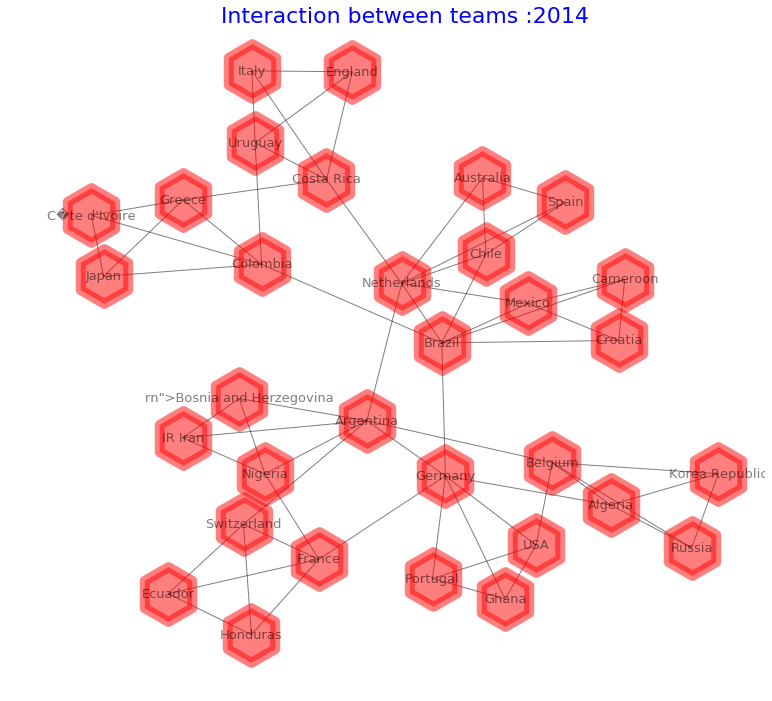

In [91]:
interactions(2014,"r")

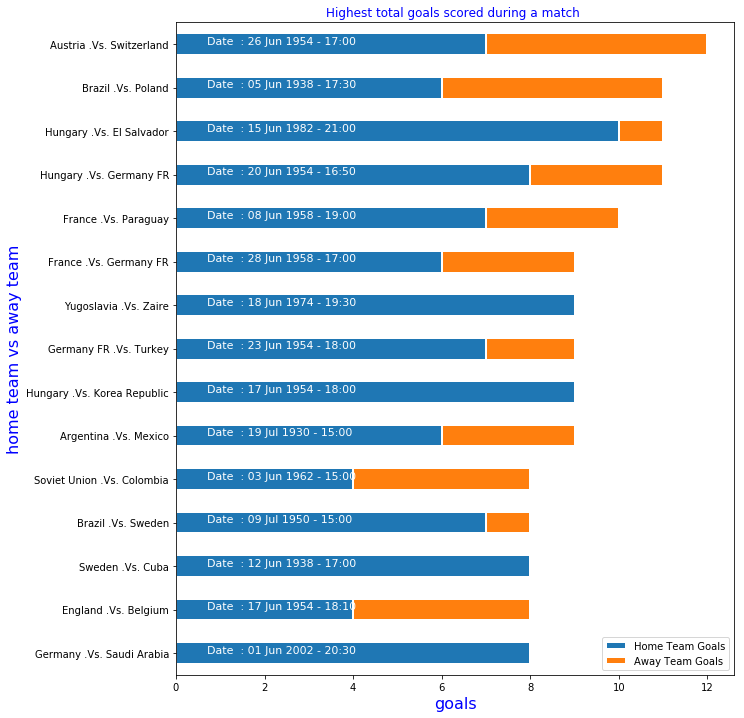

In [96]:
matches["total_goals"] = matches["Home Team Goals"] + matches["Away Team Goals"]
hig_gl = matches.sort_values(by="total_goals",ascending =False)[:15][['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
                                                                  'Home Team Goals', 'Away Team Goals', 'Away Team Name',"total_goals"]]
hig_gl["match"] = hig_gl["Home Team Name"] + " .Vs. " + hig_gl['Away Team Name']
hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals",ascending =True)
ax= hig_gl[["Home Team Goals","Away Team Goals"]].plot(kind="barh",stacked=True,
                                                       figsize=(10,12),linewidth=2,
                                                       edgecolor="w"*15)

plt.ylabel("home team vs away team",color="b",size=16)
plt.xlabel("goals",color="b",size=16)
plt.title("Highest total goals scored during a match ",color='b')

for i,j in enumerate("Date  : " + hig_gl["Datetime"]):
    ax.text(.7,i,j,color="w",fontsize=11)
    
plt.show()